In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
data1 = pd.read_csv("file_1-500.csv")
print(data1.isnull().values.any())
data1 = data1.dropna()
print(data1.isnull().values.any())
print(data1.shape)
print(data1)

True
False
(494, 2)
        file_name label
0      file_1.jpg    소외
1      file_2.jpg  다이어트
2      file_3.jpg    실패
3      file_4.jpg    긍정
4      file_5.jpg    피자
..            ...   ...
495  file_496.jpg    불만
496  file_497.jpg    폭행
497  file_498.png    통증
498  file_499.jpg    폭발
499  file_500.jpg    인사

[494 rows x 2 columns]


In [6]:
data2 = pd.read_csv("file_501-1000.csv")
data2 = data2.drop(columns='Unnamed: 2')
data2 = data2.dropna()
print(data2.isnull().values.any())
print(data2.shape)
print(data2)

False
(496, 2)
         file_name label
0     file_501.jpg    웃음
1     file_502.jpg    분노
2     file_503.jpg    분노
3     file_504.jpg    사과
4     file_505.jpg     불
..             ...   ...
495   file_996.jpg    싸움
496   file_997.jpg   심부름
497   file_998.png    설렘
498   file_999.jpg    웃음
499  file_1000.png    싸움

[496 rows x 2 columns]


In [7]:
data3 = pd.read_csv("file_1001-1500.csv")
print(data3)
data3 = data3.dropna()
print(data3.isnull().values.any())
print(data3.shape)

         file_name label
0    file_1001.jpg    이별
1    file_1002.jpg    고통
2    file_1003.jpg    도망
3    file_1004.jpg    공격
4    file_1005.jpg    짜증
..             ...   ...
487  file_1488.jpg    분노
488  file_1489.jpg    정신
489  file_1490.jpg    짜증
490  file_1491.jpg    진정
491  file_1492.jpg    웃음

[492 rows x 2 columns]
False
(491, 2)


In [8]:
data4 = pd.read_csv("file_1501-2000.csv")
data4 = data4.drop(columns='Unnamed: 2')
data4 = data4.dropna()
print(data4.isnull().values.any())
print(data4.shape)

False
(478, 2)


In [9]:
data5 = pd.read_csv("file_2001-2500.csv")
data5 = data5.dropna()
print(data5.isnull().values.any())
print(data5.shape)

False
(496, 2)


In [10]:
data = pd.concat((data1,data2,data3,data4,data5))
data_size = len(data)

In [11]:
data.reset_index(drop=True)

,file_name,label
0,file_1.jpg,소외
1,file_2.jpg,다이어트
2,file_3.jpg,실패
3,file_4.jpg,긍정
4,file_5.jpg,피자
...,...,...
2450,file_2496.jpg,첫사랑
2451,file_2497.jpg,격분
2452,file_2498.jpg,추방
2453,file_2499.jpg,친구


In [12]:
label = data['label']
print(label)
#label = np.unique(label)


0        소외
1      다이어트
2        실패
3        긍정
4        피자
       ... 
495     첫사랑
496      격분
497      추방
498      친구
499      포기
Name: label, Length: 2455, dtype: object


In [13]:
np.unique(label).shape

(878,)

In [14]:
!pip install gensim==3.8.0
import gensim


In [15]:
word2vec_model = gensim.models.Word2Vec.load('ko.bin') # https://github.com/Kyubyong/wordvectors -> word2vec model(kor) 


C:\Users\samsung\anaconda3\lib\site-packages\gensim\models\base_any2vec.py:742: UserWarning: C extension not loaded, training will be slow. Install a C compiler and reinstall gensim for fast training.
  warnings.warn(


In [16]:
word2vec_model.wv.vectors.shape # 모델 내 단어 갯수는 30185개


(30185, 200)

In [17]:
embedding_matrix = np.zeros((data_size, 200))
print(np.shape(embedding_matrix))

(2455, 200)


In [18]:
def get_vector(word):
    if word in word2vec_model:
        return word2vec_model[word]
    else:
        return None

In [19]:
for i, word in enumerate(label):
    vector_value = get_vector(word)
    if vector_value is not None:
        embedding_matrix[i] = vector_value

C:\Users\samsung\AppData\Local\Temp\ipykernel_7604\805029998.py:2: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  if word in word2vec_model:
C:\Users\samsung\AppData\Local\Temp\ipykernel_7604\805029998.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  return word2vec_model[word]


In [20]:
embedding_matrix[0]

array([-4.83972400e-01,  7.29992092e-01,  9.05890584e-01, -1.35291755e+00,
       -5.34488618e-01, -2.46234655e-01, -1.42919064e+00,  5.20610988e-01,
       -3.83976012e-01,  1.00803733e+00,  2.83408966e-02,  4.80269760e-01,
       -6.45405054e-01, -1.01187992e+00,  8.56046826e-02,  1.67805719e+00,
        1.65803547e-04,  4.11818087e-01, -6.03896677e-01,  1.48435843e+00,
        1.53078878e+00,  5.96851647e-01,  6.65712535e-01, -8.62430274e-01,
       -9.70557183e-02, -4.65859950e-01, -7.39128217e-02, -4.10421267e-02,
       -5.82414508e-01,  1.38096178e+00, -7.94653520e-02, -9.05619740e-01,
       -9.59751368e-01, -2.31023416e-01,  6.82591438e-01,  1.87213123e-01,
        2.80106097e-01, -4.92035747e-01,  1.58267379e+00,  2.34381819e+00,
        1.29630601e+00,  7.34715879e-01, -2.07634538e-01,  4.85457450e-01,
       -7.05758572e-01,  8.94518569e-03,  1.30207002e+00, -1.89327717e-01,
        4.53920782e-01, -5.20400763e-01,  2.05017850e-02,  2.14054156e-02,
        7.15260148e-01,  

In [21]:
word2vec_model['소외']

C:\Users\samsung\AppData\Local\Temp\ipykernel_7604\2413365752.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  word2vec_model['소외']


array([-4.83972400e-01,  7.29992092e-01,  9.05890584e-01, -1.35291755e+00,
       -5.34488618e-01, -2.46234655e-01, -1.42919064e+00,  5.20610988e-01,
       -3.83976012e-01,  1.00803733e+00,  2.83408966e-02,  4.80269760e-01,
       -6.45405054e-01, -1.01187992e+00,  8.56046826e-02,  1.67805719e+00,
        1.65803547e-04,  4.11818087e-01, -6.03896677e-01,  1.48435843e+00,
        1.53078878e+00,  5.96851647e-01,  6.65712535e-01, -8.62430274e-01,
       -9.70557183e-02, -4.65859950e-01, -7.39128217e-02, -4.10421267e-02,
       -5.82414508e-01,  1.38096178e+00, -7.94653520e-02, -9.05619740e-01,
       -9.59751368e-01, -2.31023416e-01,  6.82591438e-01,  1.87213123e-01,
        2.80106097e-01, -4.92035747e-01,  1.58267379e+00,  2.34381819e+00,
        1.29630601e+00,  7.34715879e-01, -2.07634538e-01,  4.85457450e-01,
       -7.05758572e-01,  8.94518569e-03,  1.30207002e+00, -1.89327717e-01,
        4.53920782e-01, -5.20400763e-01,  2.05017850e-02,  2.14054156e-02,
        7.15260148e-01,  

In [22]:
embedding_matrix.shape
print(embedding_matrix)


[[-0.4839724   0.72999209  0.90589058 ...  0.48866838  2.4333818
  -0.03765844]
 [ 0.35048863 -0.07393498  0.78308553 ...  0.40155673  0.25517148
   0.17461987]
 [-2.85505748 -2.31678057 -2.04990721 ...  0.87093157 -0.32439458
  -0.64311022]
 ...
 [-0.41746342  0.32450476 -1.39420128 ...  0.06439805  2.16535568
  -2.0068624 ]
 [-0.14243445 -1.75704241  1.10815001 ... -0.63523644  1.46610498
  -1.98671913]
 [-0.39039969 -0.01308996 -1.30699515 ...  0.07688761 -1.40589786
  -1.2347666 ]]


In [23]:
!pip install scikit-learn
from sklearn.decomposition import PCA

In [24]:
pca = PCA(n_components=2)
PCA_result = pca.fit_transform(embedding_matrix)

PCA_result = pd.DataFrame(PCA_result)
PCA_result['X'] = PCA_result.iloc[0: ,0]
PCA_result['Y'] = PCA_result.iloc[0:, 1]
PCA_final = PCA_result[['X', 'Y']]
PCA_final.head()

,X,Y
0,0.820748,-2.103324
1,-3.056454,-0.119042
2,4.329595,-5.089723
3,0.286521,-1.943229
4,-4.980280,1.726877


In [25]:
from sklearn.cluster import KMeans # K-Means
from sklearn.metrics import silhouette_score, silhouette_samples # 실루엣 계수 계산

### 200차원 vector로 clustering


C:\Users\samsung\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\samsung\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\samsung\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\samsung\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the 

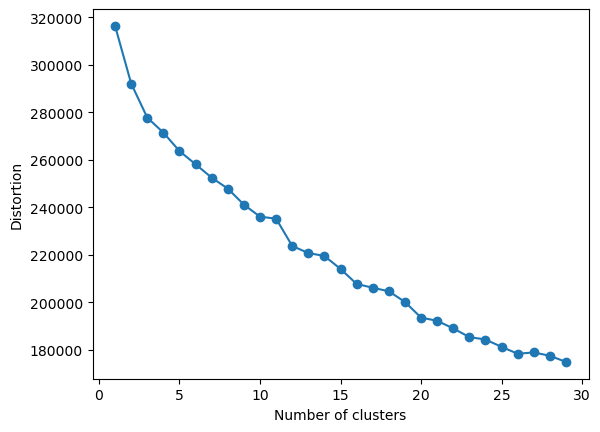

In [31]:
distortions = []

for i in range(1, 30):
    kmeans_i = KMeans(n_clusters=i, random_state=0)  # 모형 생성
    kmeans_i.fit(embedding_matrix)  # 모형 훈련
    distortions.append(kmeans_i.inertia_)

plt.plot(range(1, 30), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

C:\Users\samsung\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\samsung\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\samsung\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\samsung\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the 

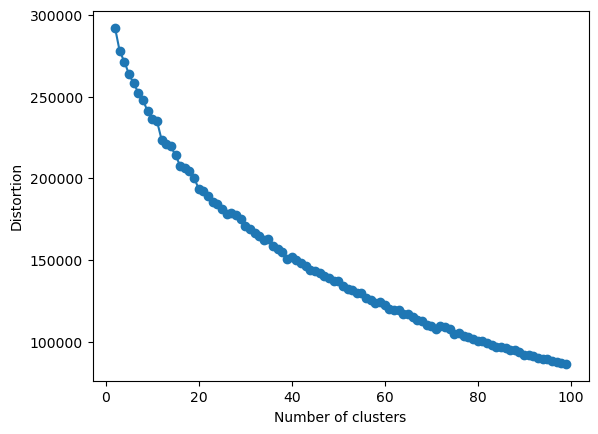

In [42]:
distortions = []

for i in range(2, 100):
    kmeans_i = KMeans(n_clusters=i, random_state=0)  # 모형 생성
    kmeans_i.fit(embedding_matrix)  # 모형 훈련
    distortions.append(kmeans_i.inertia_)

plt.plot(range(2, 100), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

C:\Users\samsung\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\samsung\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\samsung\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\samsung\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the 

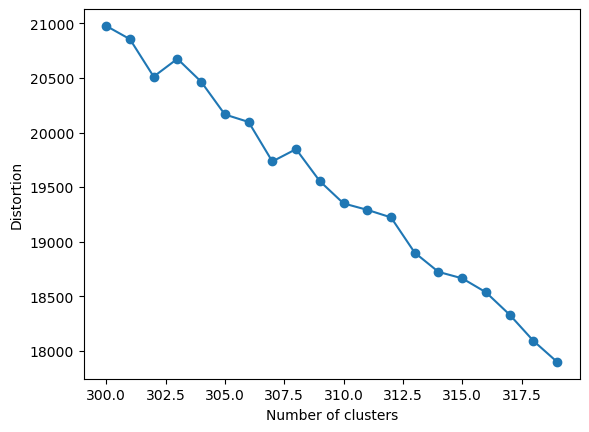

In [66]:
distortions = []

for i in range(300, 320):
    kmeans_i = KMeans(n_clusters=i, random_state=0)  # 모형 생성
    kmeans_i.fit(embedding_matrix)  # 모형 훈련
    distortions.append(kmeans_i.inertia_)

plt.plot(range(300, 320), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

C:\Users\samsung\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\samsung\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\samsung\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\samsung\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the 

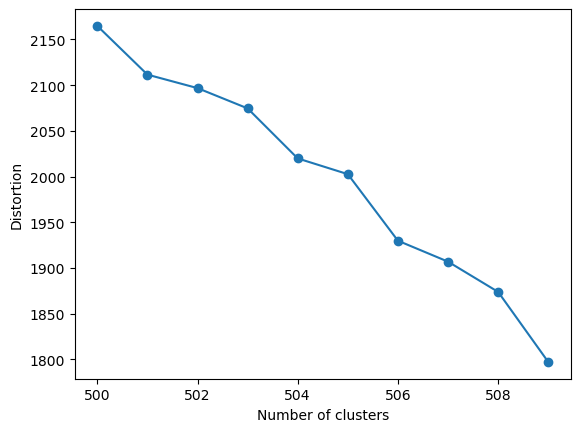

In [46]:
distortions = []

for i in range(500, 510):
    kmeans_i = KMeans(n_clusters=i, random_state=0)  # 모형 생성
    kmeans_i.fit(embedding_matrix)  # 모형 훈련
    distortions.append(kmeans_i.inertia_)

plt.plot(range(500, 510), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

C:\Users\samsung\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\samsung\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\samsung\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\samsung\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the 

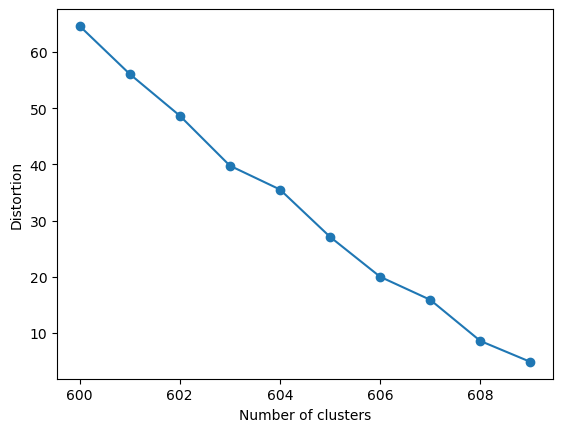

In [26]:
distortions = []

for i in range(600, 610):
    kmeans_i = KMeans(n_clusters=i, random_state=0)  # 모형 생성
    kmeans_i.fit(embedding_matrix)  # 모형 훈련
    distortions.append(kmeans_i.inertia_)

plt.plot(range(600, 610), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

C:\Users\samsung\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\samsung\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\samsung\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\samsung\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the 

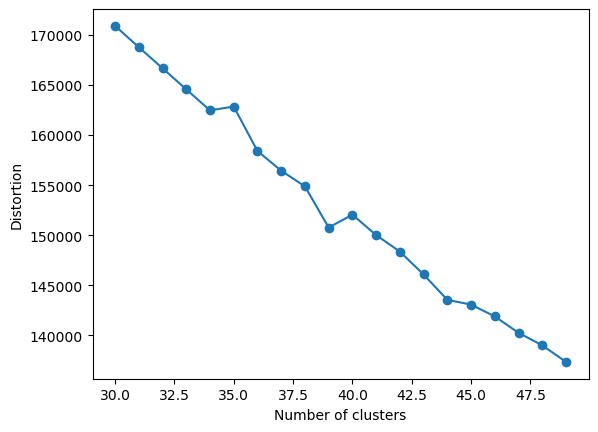

In [27]:
distortions = []

for i in range(30, 50):
    kmeans_i = KMeans(n_clusters=i, random_state=0)  # 모형 생성
    kmeans_i.fit(embedding_matrix)  # 모형 훈련
    distortions.append(kmeans_i.inertia_)

plt.plot(range(30, 50), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

### 2차원 vector로 clustering (PCA적용)


C:\Users\samsung\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\samsung\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\samsung\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\samsung\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the 

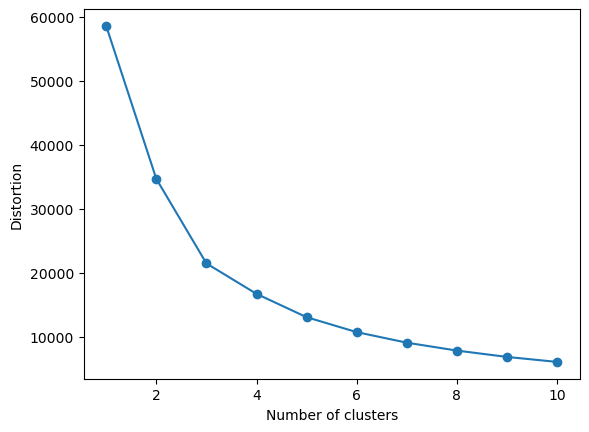

In [67]:
distortions = []

for i in range(1, 11):
    kmeans_i = KMeans(n_clusters=i, random_state=0)  # 모형 생성
    kmeans_i.fit(PCA_final[['X','Y']])  # 모형 훈련
    distortions.append(kmeans_i.inertia_)

plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [35]:
# 실루엣 계수에 따른 각 군집의 비중 시각화 함수 정의
from matplotlib import cm

def silhouetteViz(n_cluster, X_features): 
    
    kmeans = KMeans(n_clusters=n_cluster, random_state=0)
    Y_labels = kmeans.fit_predict(X_features)
    
    silhouette_values = silhouette_samples(X_features, Y_labels, metric='euclidean')

    y_ax_lower, y_ax_upper = 0, 0
    y_ticks = []

    for c in range(n_cluster):
        c_silhouettes = silhouette_values[Y_labels == c]
        c_silhouettes.sort()
        y_ax_upper += len(c_silhouettes)
        color = cm.jet(float(c) / n_cluster)
        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouettes,
                 height=1.0, edgecolor='none', color=color)
        y_ticks.append((y_ax_lower + y_ax_upper) / 2.)
        y_ax_lower += len(c_silhouettes)
    
    silhouette_avg = np.mean(silhouette_values)
    plt.axvline(silhouette_avg, color='red', linestyle='--')
    plt.title('Number of Cluster : '+ str(n_cluster)+'\n' \
              + 'Silhouette Score : '+ str(round(silhouette_avg,3)))
    plt.yticks(y_ticks, range(n_cluster))   
    plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.ylabel('Cluster')
    plt.xlabel('Silhouette coefficient')
    plt.tight_layout()
    plt.show()

C:\Users\samsung\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


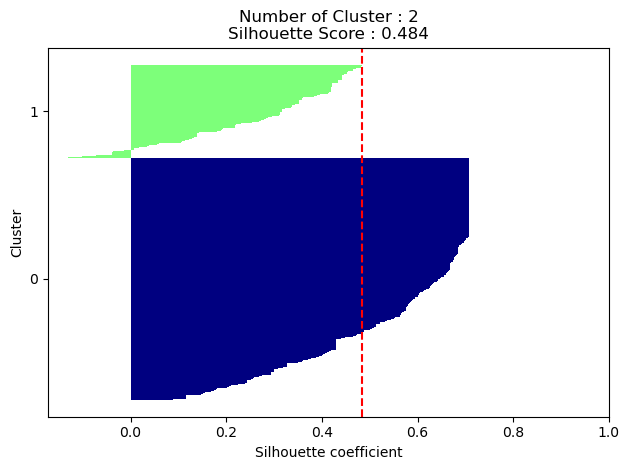

In [37]:
silhouetteViz(2, PCA_final[['X','Y']])


C:\Users\samsung\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


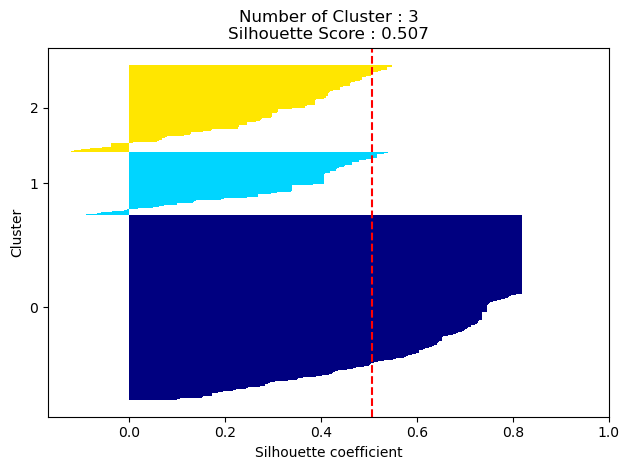

In [38]:
silhouetteViz(3, PCA_final[['X','Y']])


C:\Users\samsung\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\samsung\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\samsung\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\samsung\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the 

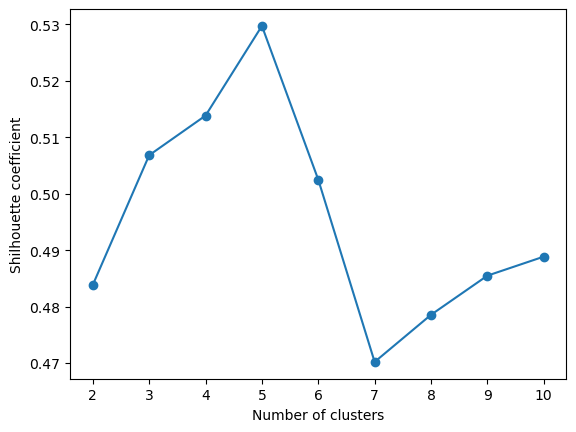

In [39]:
silhouette = []

for i in range(2,11):
    kmeans_i = KMeans(n_clusters = i, random_state = 0) # 모형 생성
    kmeans_i.fit(PCA_final[['X','Y']]) # 모형 훈련
    silhouette_values = silhouette_score(PCA_final[['X','Y']], kmeans_i.labels_)
    silhouette.append(silhouette_values)
    
plt.plot(range(2,11), silhouette, marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('Shilhouette coefficient')
plt.show()

C:\Users\samsung\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\samsung\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\samsung\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\samsung\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the 

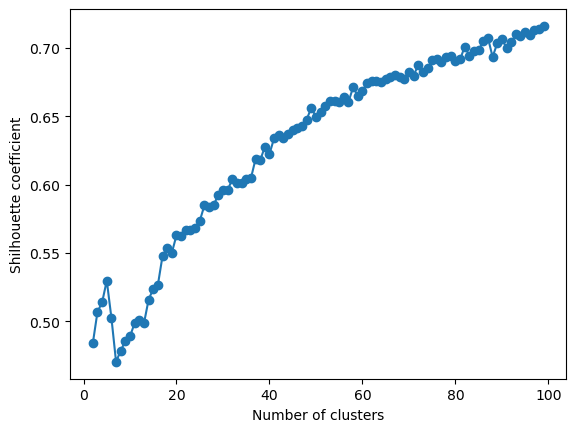

In [41]:
silhouette = []

for i in range(2,100):
    kmeans_i = KMeans(n_clusters = i, random_state = 0) # 모형 생성
    kmeans_i.fit(PCA_final[['X','Y']]) # 모형 훈련
    silhouette_values = silhouette_score(PCA_final[['X','Y']], kmeans_i.labels_)
    silhouette.append(silhouette_values)
    
plt.plot(range(2,100), silhouette, marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('Shilhouette coefficient')
plt.show()

In [40]:
# k = 5 으로 선택하고 진행
best_cluster = 5
kmeans = KMeans(n_clusters = best_cluster, random_state = 0)
Y_labels = kmeans.fit_predict(PCA_final[['X','Y']])
PCA_final['ClusterLabel'] = Y_labels
print(PCA_final.shape)
PCA_final.head()

(2455, 3)


C:\Users\samsung\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\samsung\AppData\Local\Temp\ipykernel_7604\627877373.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PCA_final['ClusterLabel'] = Y_labels


,X,Y,ClusterLabel
0,0.820748,-2.103324,0
1,-3.056454,-0.119042,1
2,4.329595,-5.089723,2
3,0.286521,-1.943229,1
4,-4.980280,1.726877,1


In [45]:
PCA_final.groupby('ClusterLabel').count()

,X,Y
ClusterLabel,,
0,470,470
1,1225,1225
2,261,261
3,453,453
4,46,46


In [62]:
PCA_cluster_df = data[['file_name', 'label']]
PCA_cluster_df['ClusterLabel'] = PCA_final['ClusterLabel']
PCA_cluster_df

,file_name,label,ClusterLabel
0,file_1.jpg,소외,0
1,file_2.jpg,다이어트,1
2,file_3.jpg,실패,2
3,file_4.jpg,긍정,1
4,file_5.jpg,피자,1
...,...,...,...
495,file_2496.jpg,첫사랑,0
496,file_2497.jpg,격분,0
497,file_2498.jpg,추방,0
498,file_2499.jpg,친구,1


In [63]:
# 군집 수에 따른 군집 데이터 분포의 시각화 함수 정의
from matplotlib import cm
def clusterScatter(n_cluster, X_features): 
    c_colors = []
    kmeans = KMeans(n_clusters=n_cluster, random_state=0)
    Y_labels = kmeans.fit_predict(X_features)

    for i in range(n_cluster):
        c_color = cm.jet(float(i) / n_cluster) #클러스터의 색상 설정
        c_colors.append(c_color)
        #클러스터의 데이터 분포를 동그라미로 시각화
        plt.scatter(X_features[Y_labels == i,0], X_features[Y_labels == i,1],
                     marker='o', color=c_color, edgecolor='black', s=50, 
                     label='cluster '+ str(i))       
    
    #각 클러스터의 중심점을 삼각형으로 표시
    for i in range(n_cluster):
        plt.scatter(kmeans.cluster_centers_[i,0], kmeans.cluster_centers_[i,1], 
                    marker='^', color=c_colors[i], edgecolor='w', s=200)
        
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

In [64]:
clusterScatter(5, PCA_final[['X','Y']])


C:\Users\samsung\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


InvalidIndexError: (array([ True, False, False, ..., False, False, False]), 0)

## KNN 적용
